<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/M%C3%A9tododeGalerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Galerkin

Este es un tipo de método de residuos pesados, donde las funciones de peso coinciden con las funciones base $β_i$.

Queremos resolver la ecuación

$-\frac{\mathrm{d}^2 u}{\mathrm{d} x^2}+u-x=0$

Sujeta a las condiciones

$u(0)=u(1)=0$

Proponemos

$u_3= \sum_{i=1}^{3} \alpha_iβ_i$

con $β_i=sen(i\pi  x)$.

Definimos

$E=-\frac{\mathrm{d}^2 u}{\mathrm{d} x^2}+u-x$

Y ahora el criterio será

$\int_{0}^{1}E\beta_i dx=0$, $i=1,2,...,N$

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sp.symbols('x') # introducimos una variable
u = sp.Function('u') # esto es una función

In [3]:
ode = -u(x).diff(x, x) + u(x) - x
sp.dsolve(ode, u(x))

Eq(u(x), C1*exp(-x) + C2*exp(x) + x)

In [4]:
sol = sp.dsolve(ode, ics={u(0): 0, u(1): 0})

In [5]:
sol

Eq(u(x), x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2)))

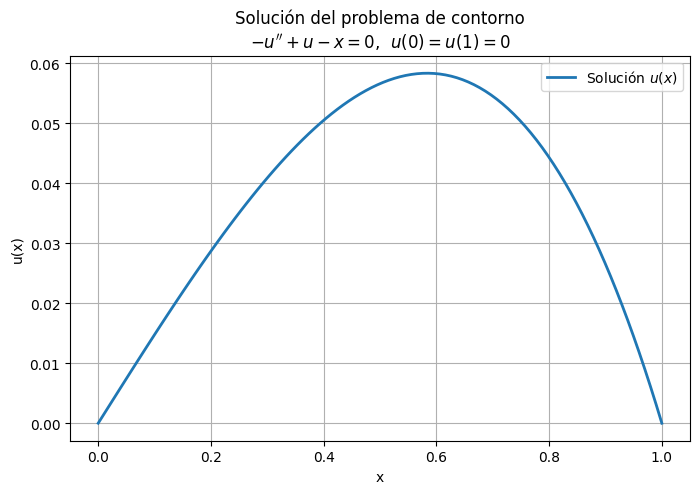

In [8]:
# Convertimos en un arreglo de numpy
u_expr = sol.rhs

u_num = sp.lambdify(x, u_expr, "numpy")

#################
xx = np.linspace(0, 1, 100)
yy = u_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title("Solución del problema de contorno\n$-u'' + u -x=0$,  $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

In [33]:
a, b,c = sp.symbols('a b c')

#Función de prueba u_n(x) que cumple u(0)=u(1)=0

u_2 = a*sp.sin(1*sp.pi*x) + b*sp.sin(2*sp.pi*x)+c*sp.sin(3*sp.pi*x)

In [34]:
u_2

a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x)

Definimos el (error) E

In [35]:
u_2_d_2 = sp.diff(u_2, x, 2)


E = -u_2_d_2 + u_2 - x

In [36]:
E

a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x) - x + pi**2*(a*sin(pi*x) + 4*b*sin(2*pi*x) + 9*c*sin(3*pi*x))

In [37]:
E.simplify()

a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x) - x + pi**2*(a*sin(pi*x) + 4*b*sin(2*pi*x) + 9*c*sin(3*pi*x))

Ahora imponemos las condiciones:

$\int_{0}^{1}Ex(1-x)dx$

$\int_{0}^{1}Ex^2(1-x)dx$

$\int_{0}^{1}Ex^3(1-x)dx$

In [38]:
I_1 = sp.integrate(E*x*(1-x), (x, 0, 1))
I_2 = sp.integrate(E*x**2*(1-x), (x, 0, 1))
I_3 = sp.integrate(E*x**3*(1-x), (x, 0, 1))

In [39]:
I_1

4*a/pi**3 + 4*a/pi + 4*c/(27*pi**3) + 4*c/(3*pi) - 1/12

In [40]:
I_2

2*a/pi**3 + 2*a/pi - 3*b/pi - 3*b/(4*pi**3) + 2*c/(27*pi**3) + 2*c/(3*pi) - 1/20

In [41]:
I_3

-42*a/pi**3 - 48*a/pi**5 + 6*a/pi - 3*b/pi - 3*b/(4*pi**3) - 14*c/(9*pi**3) - 16*c/(81*pi**5) + 2*c/pi - 1/30

In [42]:
soleq = sp.solve([I_1, I_2,I_3], [a, b, c],  simplify=True) # para igualar  a 0
soleq

{a: pi**3*(-10 + 9*pi**2)/(3840*(1 + pi**2)),
 b: -pi**3/(90 + 360*pi**2),
 c: 81*pi**3*(10 - pi**2)/(1280*(1 + 9*pi**2))}

In [43]:
u_approx = u_2.subs(soleq)
u_approx

pi**3*(-10 + 9*pi**2)*sin(pi*x)/(3840*(1 + pi**2)) - pi**3*sin(2*pi*x)/(90 + 360*pi**2) + 81*pi**3*(10 - pi**2)*sin(3*pi*x)/(1280*(1 + 9*pi**2))

In [44]:
u_approx.simplify()

pi**3*(-3*(1 + 4*pi**2)*(1 + 9*pi**2)*(10 - 9*pi**2)*sin(pi*x) - 128*(1 + pi**2)*(1 + 9*pi**2)*sin(2*pi*x) + 729*(1 + pi**2)*(1 + 4*pi**2)*(10 - pi**2)*sin(3*pi*x))/(11520*(1 + pi**2)*(1 + 4*pi**2)*(1 + 9*pi**2))

In [45]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

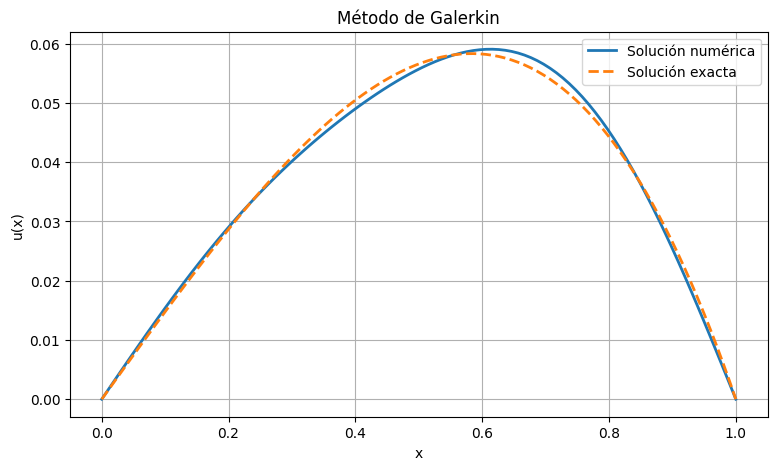

In [46]:
# Solución analítica y numérica
xx = np.linspace(0, 1, 100)

plt.figure(figsize=(9,5))
plt.plot(xx, u_approx_fn(xx), label="Solución numérica", linewidth=2)
plt.plot(xx, yy, "--", label="Solución exacta", linewidth=2)

plt.title("Método de Galerkin")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()